In [2]:
# using %matplotlib inline to immediatly draw plot after run
%matplotlib inline 

# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dotenv
import os

"""prepare environment variable"""
project_dir = os.path.join(os.path.abspath(''), os.pardir)
dotenv_path = os.path.join(project_dir, '.env')
dotenv.load_dotenv(dotenv_path)

True

# Functions

In [3]:
# functions
def check_path_existance(path):
    return os.path.exists(path)

# Get Data

In [4]:
dataset_folder = os.path.join(project_dir, os.getenv('RAW_FOLDER'), 'house-prices-advanced-regression-techniques')
train_df = None
test_df = None

if check_path_existance(dataset_folder):   
    train_df = pd.read_csv(os.path.join(dataset_folder, 'train.csv'))
    test_df = pd.read_csv(os.path.join(dataset_folder, 'test.csv'))

# Explore Data

## Finding Duplicated Records

In [5]:
"""Finding Duplicated Records"""
display(train_df[train_df.loc[:, train_df.columns != 'type'].duplicated()])
display(test_df[test_df.loc[:, test_df.columns != 'type'].duplicated()])
# No Duplicated Data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


## Check Unique Values

In [6]:
"""Check Unique Values"""
# Because we want to check if the's only 1 value inside a column
# we might drop it because it doesn't add any predictive value
def check_constant_column(df: pd.DataFrame) -> None:
    for f in df.columns:
        if df[f].nunique() == 1:
            print(f"There are {df[f].nunique()} unique values inside {f} column")

print("train: ")
check_constant_column(train_df)
print("test: ")
check_constant_column(test_df)

train: 
test: 
There are 1 unique values inside Utilities column


Don't need to drop column inside test data because it will depend on train data columns

## Check Noisy Data

In [7]:
"""Check Noisy Data"""
def check_noisy_column(df: pd.DataFrame) -> None:
    for f in df.columns:
        print(f"{f}:\t{df[f].unique()}")

print("train: ")
check_noisy_column(train_df)
print("test: ")
check_noisy_column(test_df)

train: 
Id:	[   1    2    3 ... 1458 1459 1460]
MSSubClass:	[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning:	['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage:	[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea:	[ 8450  9600 11250 ... 17217 13175  9717]
Street:	['Pave' 'Grvl']
Alley:	[nan 'Grvl' 'Pave']
LotShape:	['Reg' 'IR1' 'IR2' 'IR3']
LandContour:	['Lvl' 'Bnk' 'Low' 'HLS']
Utilities:	['AllPub' 'NoSeWa']
LotConfig:	['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3'

All data seems to have consistent values/ naming 

## Checking Incorrect Data Type

In [8]:
"""Checking Incorrect Data Type"""
display(train_df.info())
display(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

None

Found `GarageYrBlt` in float data type, we need to convert that into int 

## Find Missing Values

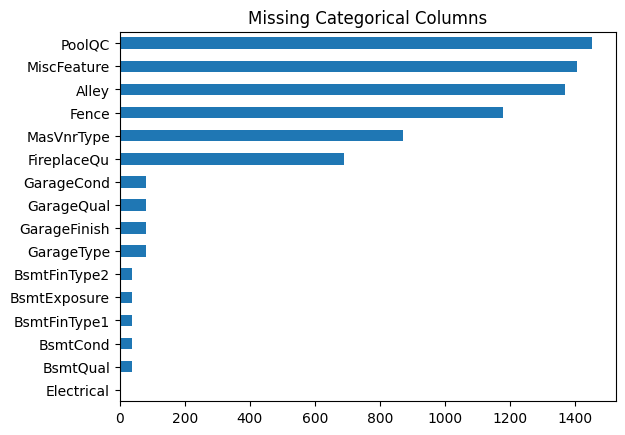

In [9]:
"""Find Missing Categorical Values"""
def plot_missing_values(
        df: pd.DataFrame,
    ) -> None:
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    missing.plot.barh()
        
categorical_columns = train_df.select_dtypes(include=['object']).columns
plot_missing_values(train_df[categorical_columns])
plt.title("Missing Categorical Columns")
plt.show()

1. `BsmtQual`, `BsmtCond`, `BsmtFinType1`, `BsmtExposure`, `BsmtFinType2`, `GarageCond`, `GarageQual`, `GarageFinish`, `GarageYrBlt`, `GarageType`, `LotFrontage`, `FireplaceQu`, `MasVnrType`, `Fence`, `Alley`, and `MiscFeature` values are NaN for a reason except `Electrical` (we will impute it with mode value of the column itself). 

2. We might replace `PoolQC`, `MiscFeature`, `Alley`, `Fence`, `MasVnrType`, `FireplaceQU` with boolean value just to tag whether those feature exist in the house

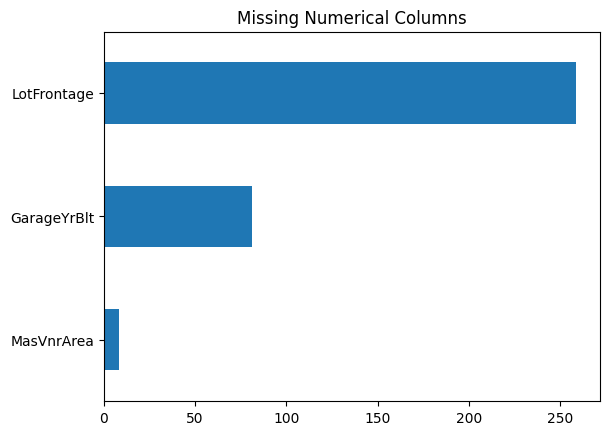

In [10]:
"""Find Missing Numerical Values"""
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns
plot_missing_values(train_df[numerical_columns])
plt.title("Missing Numerical Columns")
plt.show()

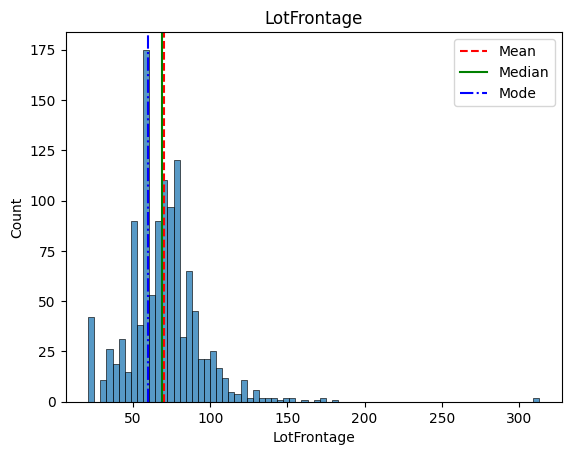

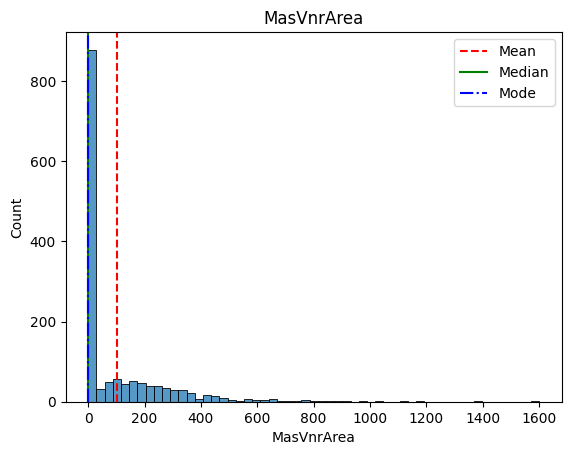

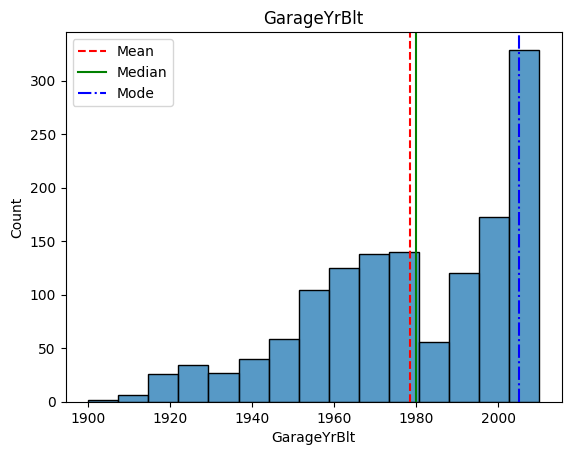

In [11]:
"""Checking The Distribution of Missing Numerical Values"""
numerical_features = train_df.select_dtypes(include=['int64', 'float64']).columns
train_df_nan_numerical_features = train_df[numerical_features].isnull().sum()
nan_numerical_features = train_df_nan_numerical_features[train_df[numerical_features].isnull().sum() > 0].index

for f in nan_numerical_features:
    sns.histplot(train_df, x=f)
    plt.axvline(train_df[f].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(train_df[f].median(), color='g', linestyle='-', label='Median')
    plt.axvline(train_df[f].mode()[0], color='b', linestyle='-.', label='Mode')
    plt.title(f)
    plt.legend()
    plt.show()

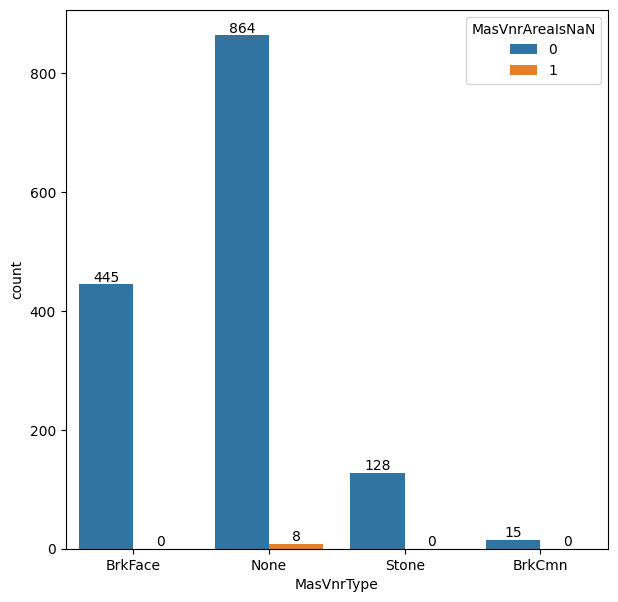

In [12]:
"""Check How to Fill Missing Values inside MasVnrArea"""
fig, ax = plt.subplots(figsize=(7, 7))
plot_df = pd.DataFrame()
plot_df['MasVnrType'] = train_df['MasVnrType']
plot_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")
plot_df['MasVnrAreaIsNaN'] = train_df['MasVnrArea'].isna().astype(int)
bar = sns.countplot(data=plot_df, x='MasVnrType', hue='MasVnrAreaIsNaN', ax=ax)
for i in bar.containers:
    bar.bar_label(i,)

There are some MasVnrType that are None but have a MasVnrType. In this case we just fill it with 0

In [13]:
"""Check How to Fill Missing Values inside GarageYrBlt"""
plot_df = train_df[['GarageYrBlt', 'GarageFinish']]
plot_df = plot_df[plot_df['GarageYrBlt'].isna()]
plot_df.isna().sum()

GarageYrBlt     81
GarageFinish    81
dtype: int64

`GarageYrBlt` with NA means it have no garage we will fill it with -1 (no garage)

`LotFrontage`: impute using the mean or median

`MasVnrArea`: impute with 0 value

`GarageYrBlt`: impute with -1 value

# Data Cleaning in Action

In [14]:
"""Fill NA Categorical Column on Purpose"""
categorical_columns_nan_on_purpose = [
    'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
]

def replace_missing_categorical_column_on_purpose(df: pd.DataFrame) -> pd.DataFrame:
    try:
        df = df.copy()
        for f in categorical_columns_nan_on_purpose:
            df[f] = df[f].fillna('Missing')
        return df
    except AttributeError:
        print("Make sure to input Pandas DataFrame")
        return None

train_df = replace_missing_categorical_column_on_purpose(train_df)

"""Fill NA Electrical Column with Mode"""
train_df['Electrical'] = train_df['Electrical'].fillna(train_df['Electrical'].mode()[0])

"""Fill NA LotFrontage with Mean"""
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

"""Fill NA MasVnrArea with 0"""
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)

"""Fill NA GarageYrBlt with 0 and convert it to int data type"""
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(-1).astype('int64')

"""Save The Cleaned Data"""
train_df.to_csv(os.path.join(project_dir, os.getenv('PROCESSED_FOLDER'), 'train_cleaned.csv'), index=False)